In [11]:
import pandas as pd
import graphviz
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [8]:
df=pd.read_csv(r'C:\Users\pnaik27\ML_2021\Decision_tree\winequality_red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5



# The data set consists following Input variables:
1 - fixed acidity
2 - volatile acidity
3 - citric acid 
4 - residual sugar 
5 - chlorides 
6 - free sulfur dioxide
7 - total sulfur dioxide 
8 - density 
9 - pH 
10 - sulphates 
11 - alcohol

The output variable gives the quality of the wine based on the input variables:
12 - quality (score between 0 and 10)

In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# No Null values

In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [12]:
y=df['quality']
x=df.drop(columns=['quality'])

In [51]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [25]:
df.corr()[['quality']].sort_values(by='quality', ascending = False)

,quality
quality,1.000000
alcohol,0.476166
sulphates,0.251397
citric acid,0.226373
fixed acidity,0.124052
residual sugar,0.013732
free sulfur dioxide,-0.050656
pH,-0.057731
chlorides,-0.128907
density,-0.174919


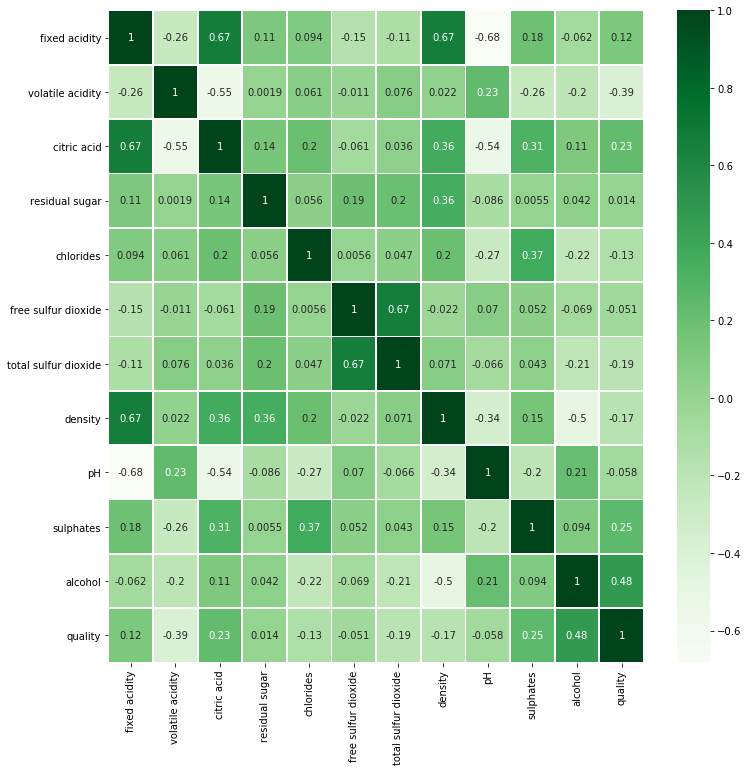

In [19]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='Greens',linewidths=0.8)

<Figure size 1800x1800 with 0 Axes>

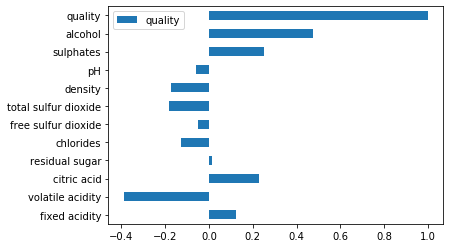

In [53]:
plt.figure(figsize=(25,25))
df.corr()[['quality']].plot(kind='barh')

In [ ]:
As alcohol level increase ==> Quality increases
As chlorides level decreases ==> Quality increases
As citric acid level increases ==> Quality increases
As density decreases ==> Quality increases
fixed acidity ==> can’t say impact on Quality
As free sulfur dioxide increases ==> Quality increases
pH ==> can’t say impact on Quality
As residual sugar increases ==> Quality increases
sulphates ==> can’t say impact on Quality
total sulfur dioxide ==> can’t say impact on Quality
As the volatile acidity decreases ==> Quality increases
But since, only below four contributes towards wine quality :
alcohol, density, volatile acidity, chlorides
Increase in the alcohol qty, increases the quality of the wine.
Decrease in the density of the wine, increases the quality of the wine.
Decrease in the volatile acidity of the wine, increases the quality of the wine.
Decrease in chlorides, increases the quality of the wine.

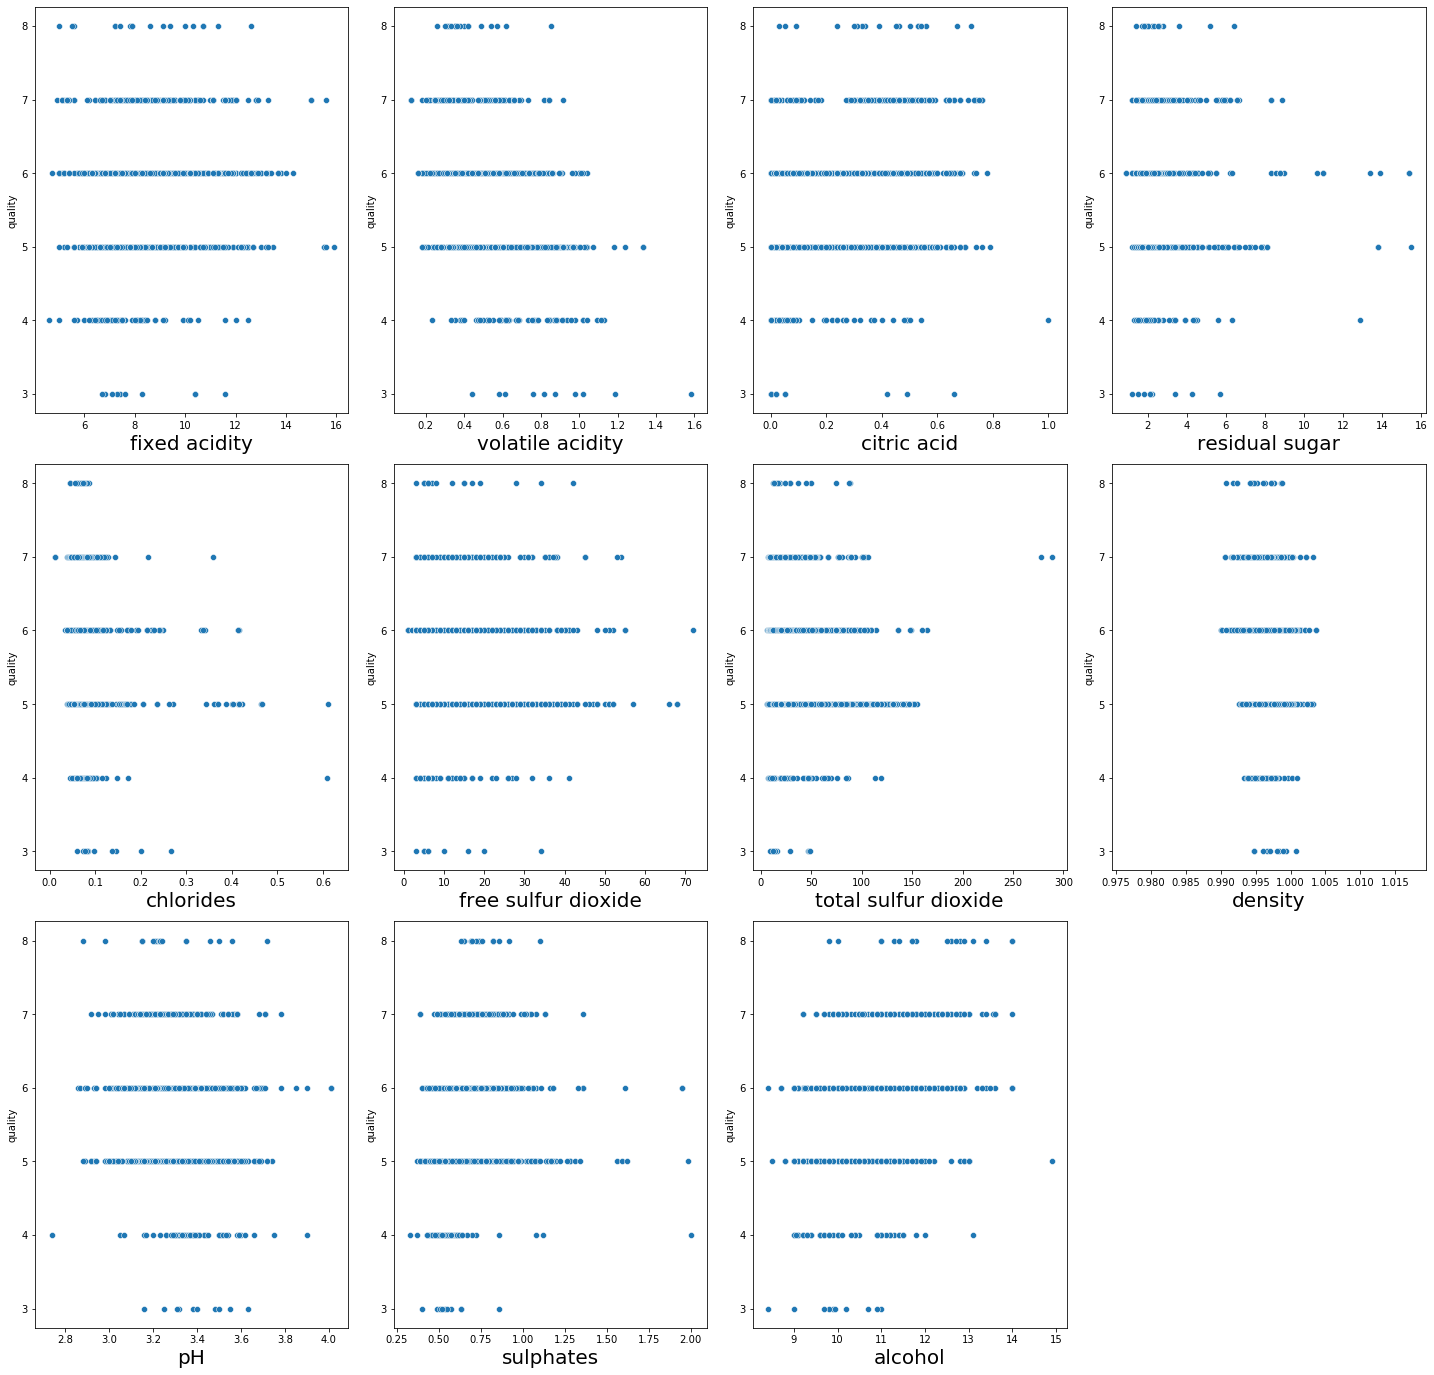

In [29]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1

for col in x:
    if plotnumber<=12:
        ax=plt.subplot(4,4,plotnumber)
        sns.scatterplot(data=x,y=y,x=col)
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

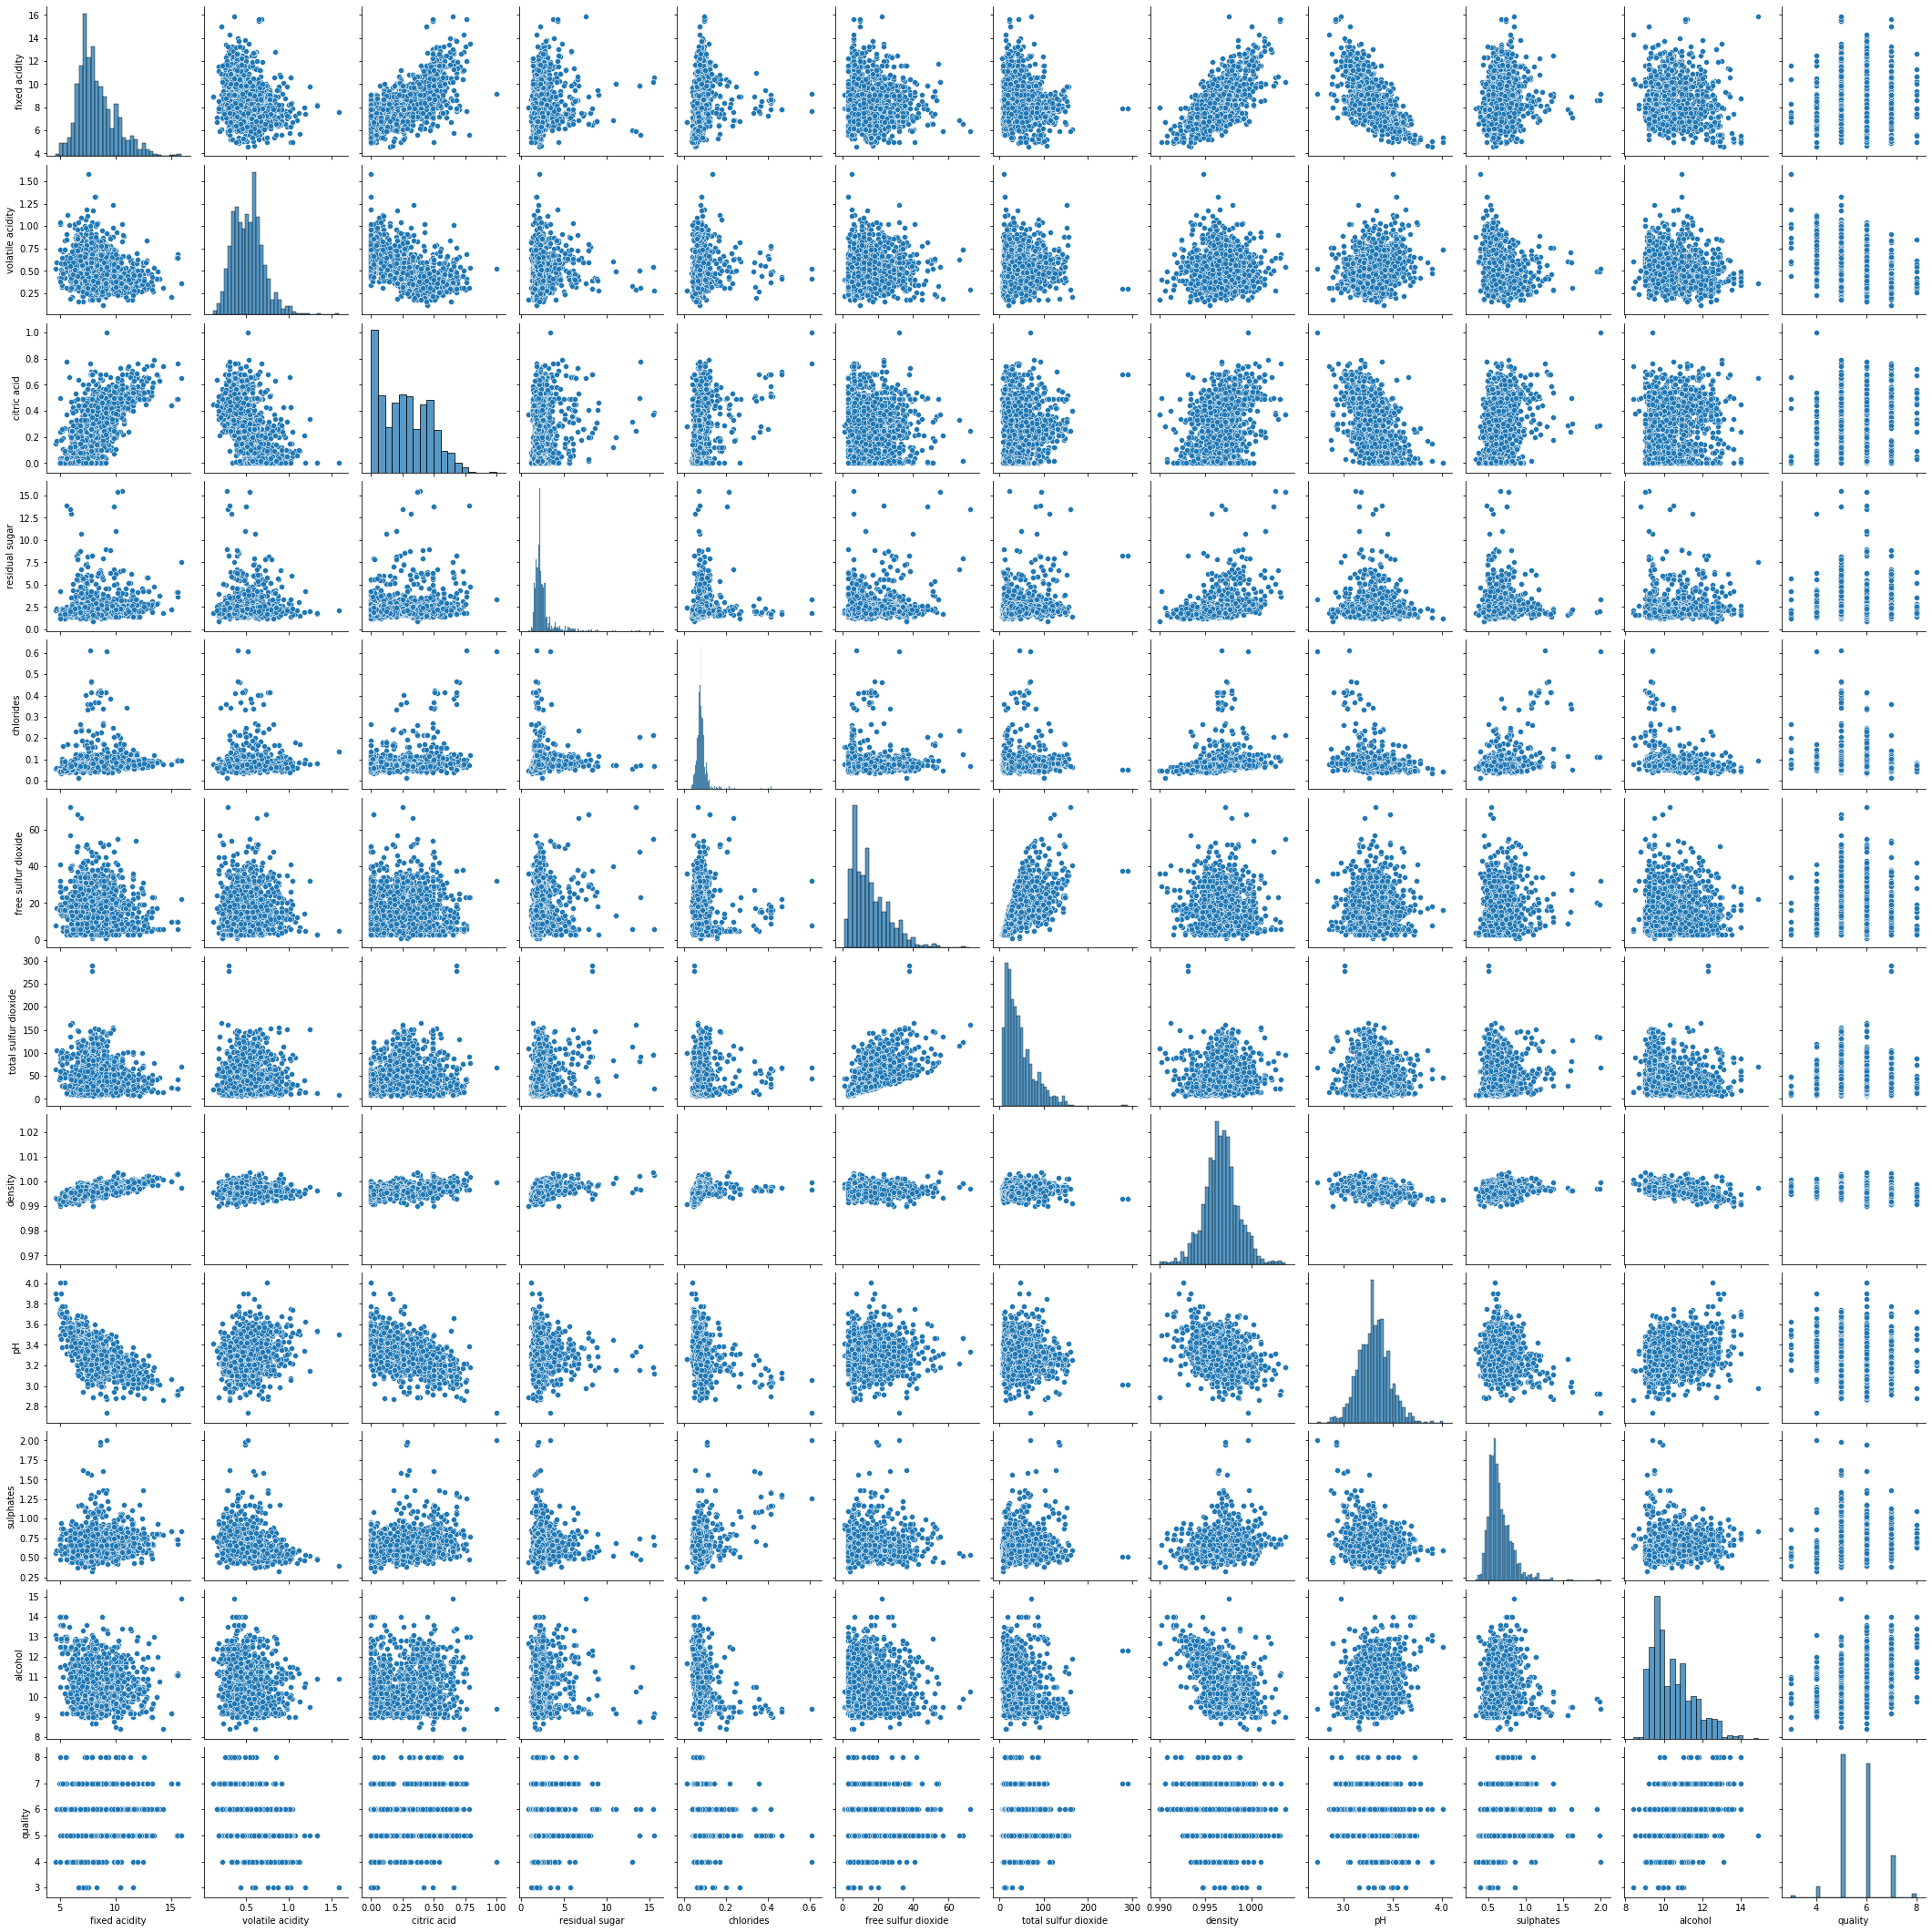

In [56]:
sns.pairplot(df)

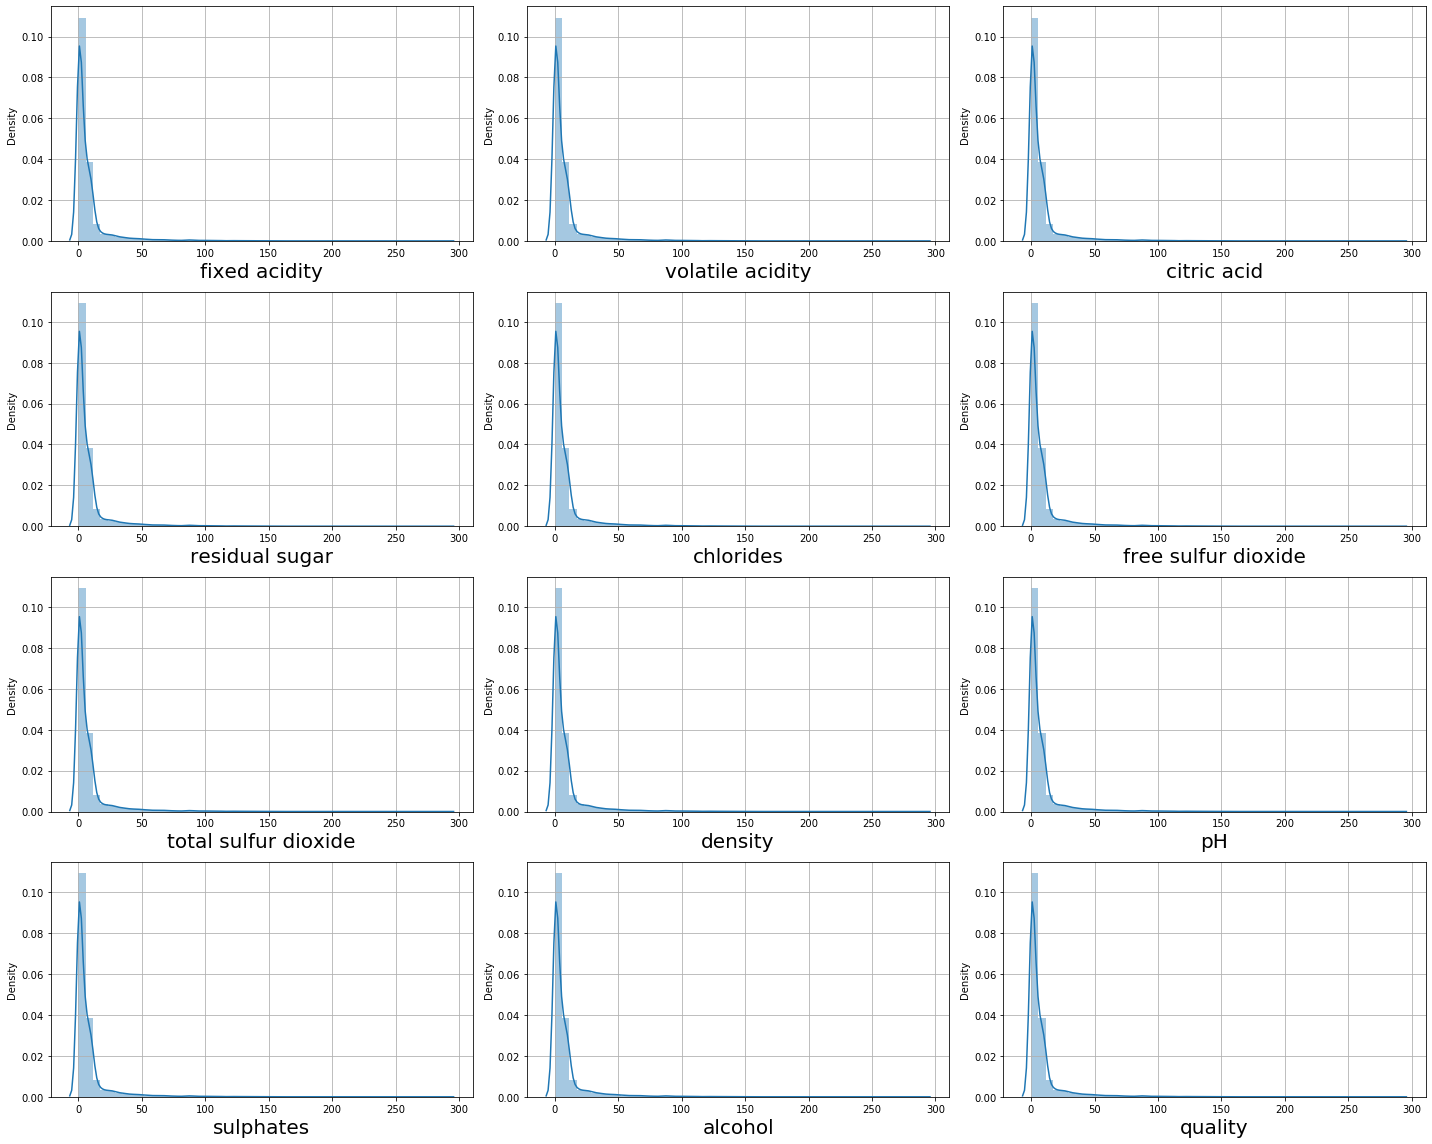

In [60]:
plt.figure(figsize=(20,16), facecolor='white')
plotnumber=1

for col in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df,label='data')
        plt.grid()
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()